In [1]:
# Import thư viện
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# Đọc dữ liệu
file_path = 'D:/TTTN/CODE/Data Fixed/data_1.csv'
df = pd.read_csv(file_path)

### RFM Analysis

Recency

In [3]:
# Tính giá trị Recency
df['Date Created'] = pd.to_datetime(df['Date Created'])
maximum = max(df['Date Created'])
maximum = maximum + pd.DateOffset(days = 1)
df['Distance'] = maximum - df['Date Created']

In [4]:
recency = df.groupby("Customer ID").Distance.min()
recency = recency.reset_index().rename(columns={"Distance": "Recency"})
recency['Recency'] = recency['Recency'].dt.days

recency.head()

,Customer ID,Recency
0,CUS0000245,260
1,CUS0000577,383
2,CUS0001401,487
3,CUS0002484,119
4,CUS0002582,490


Frequency

In [5]:
# Tính toán giá trị Frequency
freq = df.groupby("Customer ID")["Transaction Code"].count()
freq = freq.reset_index().rename(columns={"Transaction Code": "Frequency"})

freq.head()

,Customer ID,Frequency
0,CUS0000245,5
1,CUS0000577,5
2,CUS0001401,12
3,CUS0002484,3
4,CUS0002582,3


Monetary

In [6]:
# Tính toán giá trị Monetary
df["TotalPrice"] = df["Quantity"] * df["Giá bán lẻ"]
monetary = df.groupby("Customer ID").TotalPrice.sum()
monetary = monetary.reset_index().rename(columns={"TotalPrice": "Monetary"})

monetary.head()

,Customer ID,Monetary
0,CUS0000245,6144167.0
1,CUS0000577,2592129.0
2,CUS0001401,3503699.0
3,CUS0002484,748611.0
4,CUS0002582,1604195.0


In [7]:
rf = recency.merge(freq, left_on="Customer ID", right_on="Customer ID")
rfm = rf.merge(monetary, left_on="Customer ID", right_on="Customer ID")
rfm.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']

rfm.head()

,Customer ID,Recency,Frequency,Monetary
0,CUS0000245,260,5,6144167.0
1,CUS0000577,383,5,2592129.0
2,CUS0001401,487,12,3503699.0
3,CUS0002484,119,3,748611.0
4,CUS0002582,490,3,1604195.0


In [8]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4695 entries, 0 to 4694
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer ID  4695 non-null   object 
 1   Recency      4695 non-null   int64  
 2   Frequency    4695 non-null   int64  
 3   Monetary     4695 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 146.8+ KB


{'whiskers': [<matplotlib.lines.Line2D at 0x179b10ec6d0>,
 'caps': [<matplotlib.lines.Line2D at 0x179b10ecc10>,
 'boxes': [<matplotlib.lines.Line2D at 0x179b10ec430>],
 'medians': [<matplotlib.lines.Line2D at 0x179b1108190>],
 'fliers': [<matplotlib.lines.Line2D at 0x179b1108430>],
 'means': []}

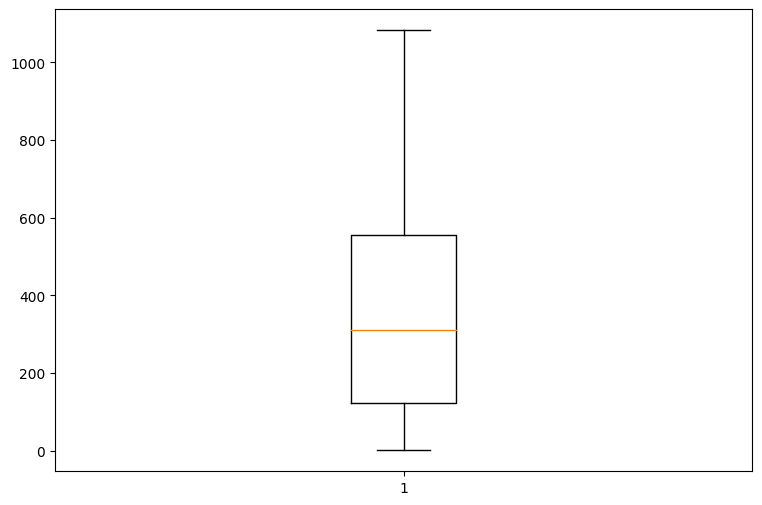

In [9]:
fig = plt.figure(1, figsize=(9, 6))
plt.boxplot(rfm['Recency'])

{'whiskers': [<matplotlib.lines.Line2D at 0x179b115f0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x179b115f640>,
 'boxes': [<matplotlib.lines.Line2D at 0x179b114fdf0>],
 'medians': [<matplotlib.lines.Line2D at 0x179b115fb80>],
 'fliers': [<matplotlib.lines.Line2D at 0x179b115fe20>],
 'means': []}

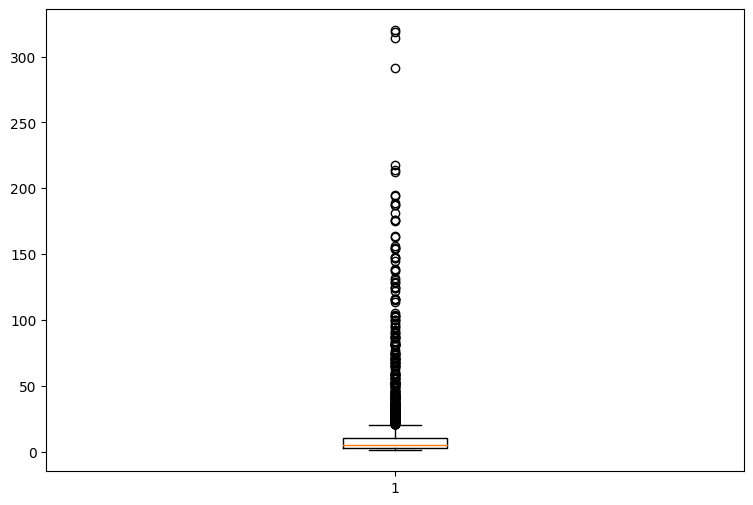

In [10]:
fig = plt.figure(1, figsize=(9, 6))
plt.boxplot(rfm['Frequency'])

{'whiskers': [<matplotlib.lines.Line2D at 0x179b157e340>,
 'caps': [<matplotlib.lines.Line2D at 0x179b157e790>,
 'boxes': [<matplotlib.lines.Line2D at 0x179b157e0a0>],
 'medians': [<matplotlib.lines.Line2D at 0x179b157ecd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x179b157ef70>],
 'means': []}

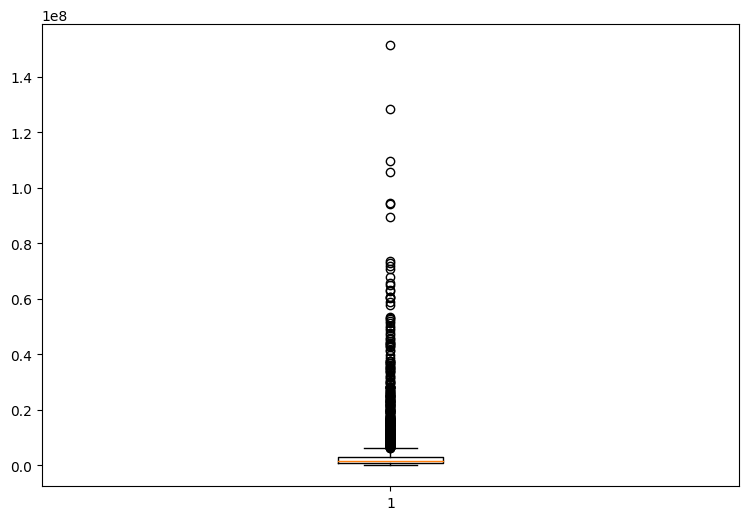

In [11]:
fig = plt.figure(1, figsize=(9, 6))
plt.boxplot(rfm['Monetary'])

In [12]:
# Xử lý outlier Frequency
q1 = rfm['Frequency'].quantile(0.25)
q3 = rfm['Frequency'].quantile(0.75)
iqr = q3 - q1
rfm = rfm[(rfm['Frequency'] >= q1 - 1.5*iqr) & (rfm['Frequency'] <= q3 + 1.5*iqr)]

In [13]:
# Xử lý outlier cho Monetary
q1 = rfm['Monetary'].quantile(0.25)
q3 = rfm['Monetary'].quantile(0.75)
iqr = q3 - q1
rfm = rfm[(rfm['Monetary'] >= q1 - 1.5*iqr) & (rfm['Monetary'] <= q3 + 1.5*iqr)]

{'whiskers': [<matplotlib.lines.Line2D at 0x179b1693f40>,
 'caps': [<matplotlib.lines.Line2D at 0x179b16a44c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x179b1693ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x179b16a4a00>],
 'fliers': [<matplotlib.lines.Line2D at 0x179b16a4ca0>],
 'means': []}

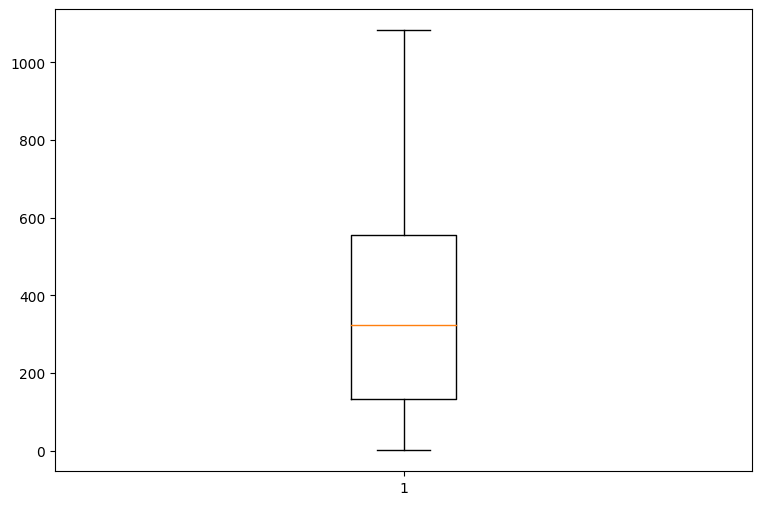

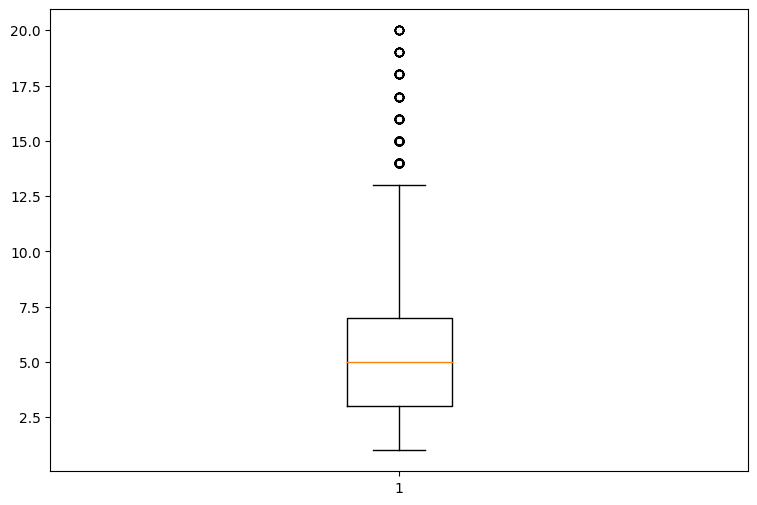

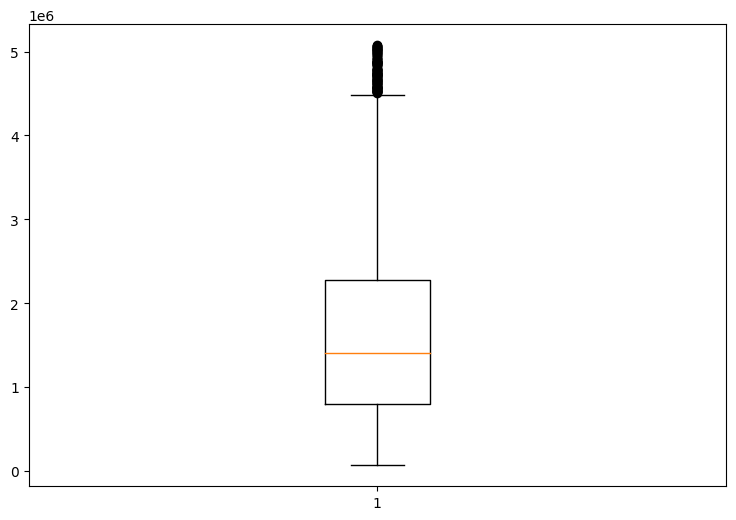

In [14]:
# Mô tả lại dữ liệu rfm sau khi xử lý
fig = plt.figure(3, figsize=(9, 6))
plt.boxplot(rfm['Recency'])

fig = plt.figure(2, figsize=(9, 6))
plt.boxplot(rfm['Frequency'])

fig = plt.figure(1, figsize=(9, 6))
plt.boxplot(rfm['Monetary'])

In [15]:
# Chuẩn hóa dữ liệu rfm sau khi xử lý outlier
RFM_Clustering = rfm[['Recency', 'Frequency', 'Monetary']]
scaler = StandardScaler()
RFM_Clustering_scaler = scaler.fit_transform(RFM_Clustering)

In [16]:
RFM_Clustering_scaler.shape

(4047, 3)

In [17]:
RFM_Clustering_scaler = pd.DataFrame(RFM_Clustering_scaler)
RFM_Clustering_scaler.columns = ['Recency', 'Frequency','Monetary']
RFM_Clustering_scaler.head()

,Recency,Frequency,Monetary
0,0.055439,-0.113060,0.808500
1,0.425598,1.763258,1.613594
2,-0.884194,-0.649151,-0.819687
3,0.436275,-0.649151,-0.064039
4,-0.873516,-0.649151,-0.605594


c:\Users\fna\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\fna\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\fna\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\fna\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.

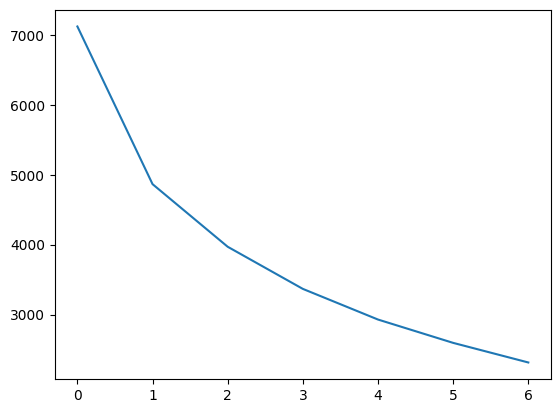

In [18]:
# Tìm số cụm tối ưu
a = []
range_n_cluster = [2,3,4,5,6,7,8]
for i in range_n_cluster:
    kmeans = KMeans(n_clusters=i, max_iter=50)
    kmeans.fit(RFM_Clustering_scaler)
    a.append(kmeans.inertia_)
plt.plot(a)

In [19]:
# Xây dựng mô hình
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(RFM_Clustering_scaler)

c:\Users\fna\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(max_iter=50, n_clusters=3)

In [20]:
rfm['Cluster ID'] = kmeans.labels_
rfm.head()

,Customer ID,Recency,Frequency,Monetary,Cluster ID
1,CUS0000577,383,5,2592129.0,2
2,CUS0001401,487,12,3503699.0,0
3,CUS0002484,119,3,748611.0,2
4,CUS0002582,490,3,1604195.0,1
5,CUS0002739,122,3,991018.0,2


<Axes: xlabel='Cluster ID', ylabel='Recency'>

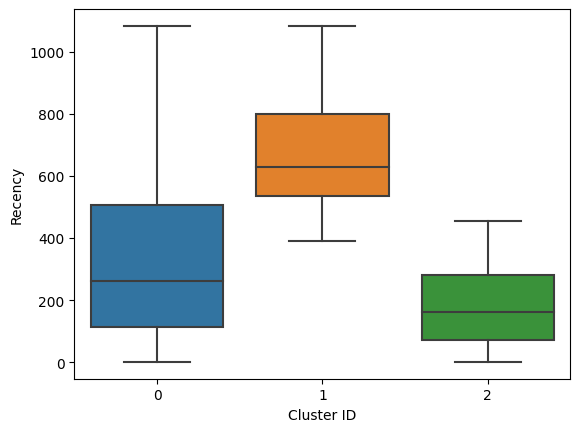

In [21]:
# Mô tả dữ liệu sau khi đã phân cụm
sns.boxplot(x = rfm['Cluster ID'], y = rfm['Recency'])

<Axes: xlabel='Cluster ID', ylabel='Frequency'>

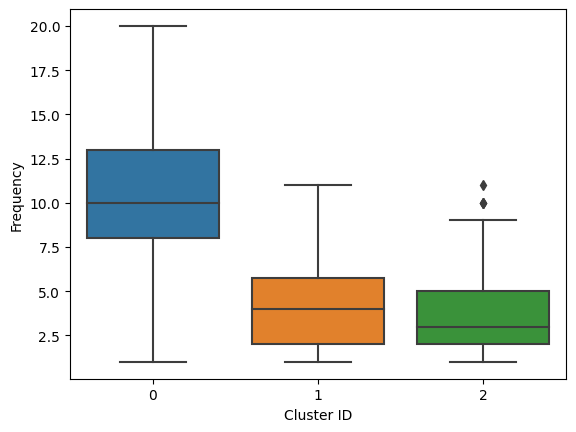

In [22]:
sns.boxplot(x = rfm['Cluster ID'], y = rfm['Frequency'])

<Axes: xlabel='Cluster ID', ylabel='Monetary'>

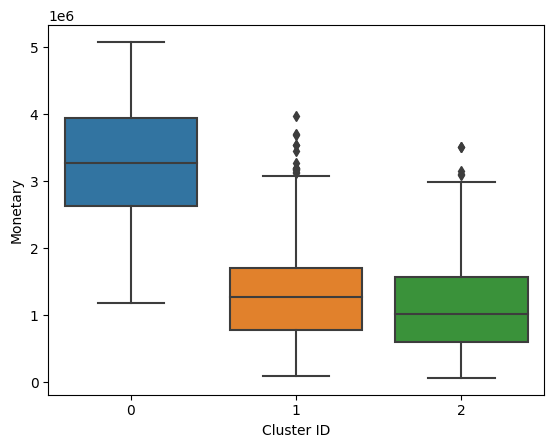

In [23]:
sns.boxplot(x = rfm['Cluster ID'], y = rfm['Monetary'])

Tính RFM_SCORE

In [24]:
# Tính điểm các giá trị Recency, Frequency và Monetary
rfm["RecencyScore"] = pd.qcut(rfm["Recency"], 5, labels = [5, 4 , 3, 2, 1])
rfm["FrequencyScore"]= pd.qcut(rfm["Frequency"].rank(method="first"),5, labels=[1,2,3,4,5])
rfm["MonetaryScore"] = pd.qcut(rfm['Monetary'], 5, labels = [1, 2, 3, 4, 5])

In [25]:
# RFM_SCORE
rfm["RFM_SCORE"] = (rfm['RecencyScore'].astype(str) + 
                     rfm['FrequencyScore'].astype(str) + 
                     rfm['MonetaryScore'].astype(str))

rfm.head()

,Customer ID,Recency,Frequency,Monetary,Cluster ID,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
1,CUS0000577,383,5,2592129.0,2,3,3,5,335
2,CUS0001401,487,12,3503699.0,0,2,5,5,255
3,CUS0002484,119,3,748611.0,2,4,2,2,422
4,CUS0002582,490,3,1604195.0,1,2,2,3,223
5,CUS0002739,122,3,991018.0,2,4,2,2,422


In [26]:
# Phân nhóm khách hàng dựa vào RFM_SCORE
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

rfm['Segment'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)

In [27]:
# Nhóm lại cột Segment
def map_segment_to_group(segment):
    if segment in ['Champions', 'Loyal Customers']:
        return 'Khách hàng tốt nhất'
    elif segment in ["Can't Loose", 'Potential Loyalists']:
        return 'Khách hàng chi tiêu lớn'
    elif segment in ['About to Sleep', 'Promising']:
        return 'Khách hàng thân thiết'
    elif segment in ['New Customers', 'At Risk']:
        return 'Khách hàng tiềm năng'
    elif segment in ['Hibernating', 'Need Attention']:
        return 'Khách hàng không tiềm năng'

rfm['New Segment'] = rfm['Segment'].apply(map_segment_to_group)

In [28]:
rfm[["New Segment","Recency", "Frequency", "Monetary"]].groupby("New Segment").agg(["mean", "count","sum"])

Recency               Frequency               
                                  mean count     sum      mean count   sum   
New Segment                                                                  
Khách hàng chi tiêu lớn     263.107066   934  245742  5.773019   934  5392  \
Khách hàng không tiềm năng  591.855803   853  504853  2.841735   853  2424   
Khách hàng thân thiết       277.997881   472  131215  1.896186   472   895   
Khách hàng tiềm năng        577.785623   779  450095  5.187420   779  4041   
Khách hàng tốt nhất         153.675917  1009  155059  9.108028  1009  9190   

                                Monetary                      
                                    mean count           sum  
New Segment                                                   
Khách hàng chi tiêu lớn     1.723698e+06   934  1.609934e+09  
Khách hàng không tiềm năng  1.105391e+06   853  9.428988e+08  
Khách hàng thân thiết       7.617520e+05   472  3.595470e+08  
Khách hàng tiềm năng        1.676503e+06   779  1.305996e+09  
Khách hàng tốt nhất         2.544343e+06  1009  2.567242e+09

In [29]:
# Tạo các khoảng thời gian 
bins = [0, 90, 180, 270, float('inf')]
labels = ['Dưới 3 tháng', 'Từ 3 đến 6 tháng', 'Từ 6 đến 9 tháng', 'Từ 9 đến 12 tháng']
# Thêm cột mới 'R Type' vào df
rfm['R Type'] = pd.cut(rfm['Recency'], bins=bins, labels=labels, right=False)

# Tạo các khoảng tần suất
bins = [1, 3, 6, 9, float('inf')]
labels = ['Từ 1 đến 3 lần', 'Từ 3 đến 6 lần', 'Từ 6 đến 9 lần', 'Trên 9 lần']
# Thêm cột mới 'F Type' vào df
rfm['F Type'] = pd.cut(rfm['Frequency'], bins=bins, labels=labels, right=False)

# Tạo các khoảng mức giá
bins = [0, 1000000, 2000000, 3000000, float('inf')]
labels = ['Dưới 1 000 000', 'Từ 1 000 000 đến 2 000 000', 'Từ 2 000 000 đến 3 000 000', 'Trên 3 000 000']
# Thêm cột mới 'M Type' vào df
rfm['M Type'] = pd.cut(rfm['Monetary'], bins=bins, labels=labels, right=False)

In [31]:
# Lấy giá trị gần nhất cột 'Date Created' của df_off
recent_date = df.groupby('Customer ID')['Date Created'].max().reset_index()

# Merge rfm với recent_date
rfm = pd.merge(rfm, recent_date, on="Customer ID")

# Tính tổng doanh thu theo "Customer ID"
total_revenue = df.groupby('Customer ID')['Doanh thu chưa thuế'].sum().reset_index()

# Merge rfm với total_revenue
rfm = pd.merge(rfm, total_revenue, on='Customer ID')

In [32]:
# Xuất ra file csv
rfm.to_csv(r'D:\TTTN\CODE\Data Fixed\rfm.csv', index=False, encoding='utf-8-sig')